In [1]:
import cv2
import numpy as np
import numpy.linalg as npl
from matplotlib import pyplot as plt
from matplotlib import cbook

## Experimenting with recreating the image using albedo and shading

In [2]:
# Just to avoid more typing than necessary
def imshow(input):
    plt.axis('off')
    plt.imshow(input)

In [3]:
img = plt.imread('./church/input.png')
normals = plt.imread('./church/normals.png')
albedo = plt.imread('./church/ours_alb.png')
shading = plt.imread('./church/ours_shd.png')
shading = np.dstack((shading, shading, shading)) 
# ^ shading now has 3 channels despite being grayscale
# otherwise numpy will complain shapes of albedo and shading do not match

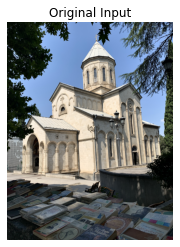

In [4]:
plt.axis('off')
plt.title("Original Input")
plt.imshow(img)

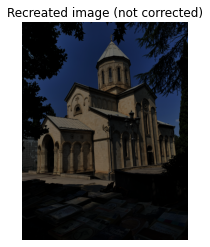

In [5]:
# This is how the image looks like if we don't correct albedo and shading

linear_recreated_img = albedo * shading
plt.title("Recreated image (not corrected)")
imshow(linear_recreated_img)

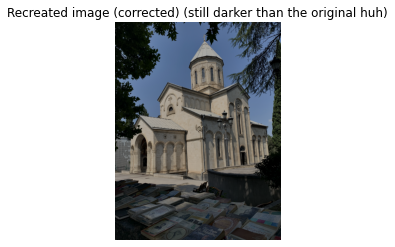

In [6]:
albedo_corrected = albedo ** 0.4545
shading_corrected = shading ** 0.4545
recreated_img = albedo_corrected * shading_corrected

plt.title("Recreated image (corrected) (still darker than the original huh)")
imshow(recreated_img)

## Now actual relighting... Create new shading 
It's working! Kind of. The scene is way too dark but it relights the building perfectly

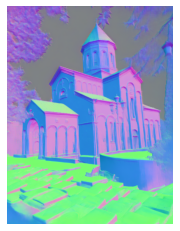

In [7]:
# So this is what our normals look like
imshow(normals)

In [8]:
# Make normals in a range from -1 to 1
normals = normals * 2 - 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


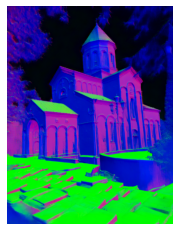

In [9]:
imshow(normals)

In order to get a new shabby relit image, call the calculate_shading function (below) with two inputs:
* light_dir = light direction in a form of a directional vector, doesn't need to be normalized
* a normals map

In [10]:
# Returns a normalized light vector with the same dimensions as the original image
def get_new_light_dir(light_dir, original_image):
    light_dir = np.array(light_dir)
    magnitude = np.sum(light_dir ** 2)
    normalized_light_dir = light_dir / magnitude
    
    new_light_dir = np.zeros(np.shape(original_image))
    new_light_dir[:] = normalized_light_dir
    
    return new_light_dir

In [19]:
def calculate_shading(light_dir, normals):
    new_light_dir = get_new_light_dir(light_dir, normals)
    
    # Dot product (np.dot doesn't work for more than 2 dimensions)
    new_shading = normals * light_dir
    new_shading = np.sum(new_shading, axis=2)
    
    # Stack the single grayscale value in three RGB channels
    new_shading = np.dstack([new_shading, new_shading, new_shading])
    
    imshow(new_shading)
    
    # If we use the albedo_corrected in this equation (albedo ** 0.4545), the image looks a lot brighter
    new_image = albedo * new_shading
    
    # TODO: this gives us NaN values!
    new_image = new_image ** 0.4545
    
    return new_image


In [20]:
def showcase_new_shading():
    top_shading = calculate_shading([0, 1, 0], normals)
    right_shading = calculate_shading([-1, 0, 0], normals)
    left_shading = calculate_shading([1, 0, 0], normals)
    slightly_left = calculate_shading([1, 1, 0], normals)
    
    fig, ax = plt.subplot_mosaic([['image', 'top', 'left', 'right', 'slightly_left']], figsize=(20,4.5))

    ax['image'].imshow(img)
    ax['image'].axis('off')
    ax['image'].set_title('Original')

    ax['top'].imshow(top_shading)
    ax['top'].axis('off')
    ax['top'].set_title('Top shading')

    ax['left'].imshow(left_shading)
    ax['left'].axis('off')
    ax['left'].set_title('Left shading')

    ax['right'].imshow(right_shading)
    ax['right'].axis('off')
    ax['right'].set_title('Right shading')

    ax['slightly_left'].imshow(slightly_left)
    ax['slightly_left'].axis('off')
    ax['slightly_left'].set_title('Slightly left shading')

    plt.show()

## Work so far (visual showcase)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\anial\AppData\Local\Temp\ipykernel_4520\3941883577.py:17: RuntimeWarning: invalid value encountered in power
  new_image = new_image ** 0.4545
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


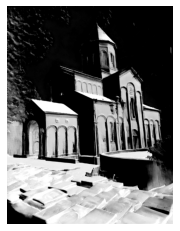

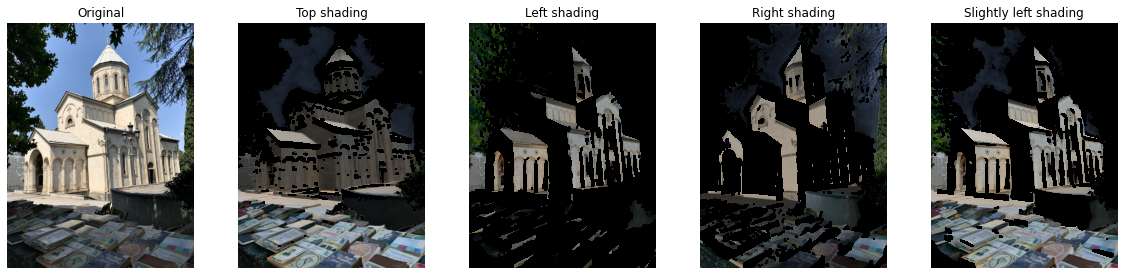

In [21]:
showcase_new_shading()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\anial\AppData\Local\Temp\ipykernel_4520\3941883577.py:17: RuntimeWarning: invalid value encountered in power
  new_image = new_image ** 0.4545


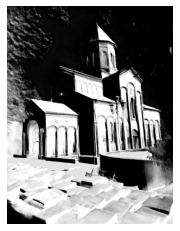

In [22]:
slightly_left = calculate_shading([1, 1, 0.3], normals)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


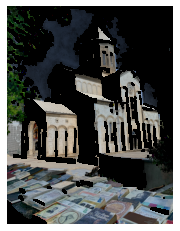

In [23]:
imshow(slightly_left)

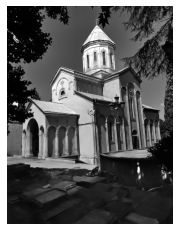

In [16]:
imshow(shading)

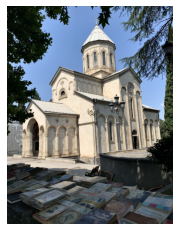

In [17]:
imshow(img)

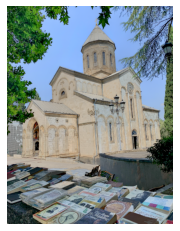

In [18]:
imshow(albedo_corrected)